In [3]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.3 MB/s eta 0:00:00


In [4]:
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.8 MB/s eta 0:00:00


# **BB84 encryption Protocol Simulation**

This notebook is related to implementation of BB 84 encryption protocol.

In [5]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

Creating Alice States and Bob Basis to measure qubits.

The 0 and 1 are representing following criteria:
basis: array of 0s and 1s denoting the basis to be used for encoding
            #0 -> Computational Basis
            #1 -> Hadamard Basis
measurement_basis: array of 0s and 1s denoting the basis to be used for measurement
            #0 -> Computational Basis
            #1 -> Hadamard Basis

In [19]:
n_qubits = 8
np.random.seed(123)

alice_basis = np.random.randint(2, size=n_qubits)
alice_state = np.random.randint(2, size=n_qubits)
bob_basis = np.random.randint(2, size=n_qubits)


print(f"Alice's State:\t {np.array2string(alice_state)}")
print(f"Alice's Bases:\t {np.array2string(alice_basis)}")
print(f"Bob's Bases:\t {np.array2string(bob_basis)}")

Alice's State:	 [1 0 1 1 0 1 0 1]
Alice's Bases:	 [0 1 0 0 0 0 0 1]
Bob's Bases:	 [0 1 1 0 0 0 1 1]


We have randomly generated states with seed.

In [20]:
from qiskit import QuantumCircuit
import numpy as np

def quantum_circuit(state, basis, measurement_basis):


    num_qubits = len(state)

    qc = QuantumCircuit(num_qubits)

    # Alice prepares qubits
    for i in range(len(basis)):
        if state[i] == 1:
            qc.x(i)
        if basis[i] == 1:
            qc.h(i)
    qc.barrier()
    # Measurement performed by Bob
    for i in range(len(measurement_basis)):
        if measurement_basis[i] == 1:
            qc.h(i)

    qc.measure_all()

    return qc

We implemented the random states to the quantum circuit

In [21]:
circuit = quantum_circuit(alice_state, alice_basis, bob_basis)
backend=AerSimulator()
job=backend.run(circuit)
result=job.result()
key=result.get_counts().most_frequent()
encryption_key = ''
for i in range(n_qubits):
    if alice_basis[i] == bob_basis[i]:
         encryption_key += str(key[i])
print(f"Generated Encryption Key: {encryption_key}")

Generated Encryption Key: 110101


Then we simulated the quantum circuit with defualt 1000 shots and got the histogram.

In [22]:
print(circuit)

        ┌───┐      ░       ░ ┌─┐                     
   q_0: ┤ X ├──────░───────░─┤M├─────────────────────
        ├───┤      ░ ┌───┐ ░ └╥┘┌─┐                  
   q_1: ┤ H ├──────░─┤ H ├─░──╫─┤M├──────────────────
        ├───┤      ░ ├───┤ ░  ║ └╥┘┌─┐               
   q_2: ┤ X ├──────░─┤ H ├─░──╫──╫─┤M├───────────────
        ├───┤      ░ └───┘ ░  ║  ║ └╥┘┌─┐            
   q_3: ┤ X ├──────░───────░──╫──╫──╫─┤M├────────────
        └───┘      ░       ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ───────────░───────░──╫──╫──╫──╫─┤M├─────────
        ┌───┐      ░       ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ┤ X ├──────░───────░──╫──╫──╫──╫──╫─┤M├──────
        └───┘      ░ ┌───┐ ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ───────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐┌───┐ ░ ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├┤ H ├─░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘└───┘ ░ └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/══════════════════════╩══╩══╩══╩══╩══╩══╩══╩═
                            

    Alice's Part:
        Alice prepares qubits, typically by encoding them in a superposition state.
        She achieves this by applying a Hadamard gate to each qubit, inducing a state of quantum superposition wherein the qubit exists in a probabilistic combination of both 0 and 1 states.
        Following superposition, Alice measures each qubit in the computational basis, collapsing the superposition into a definite classical state.

    Bob's Part:
        Bob's role involves the measurement of qubits sent by Alice.
        To align his measurement basis with Alice's encoding, Bob applies Hadamard gates to his qubits before performing measurements.
        This step allows Bob to measure the qubits in the Hadamard basis, complementing Alice's choice of the computational basis.

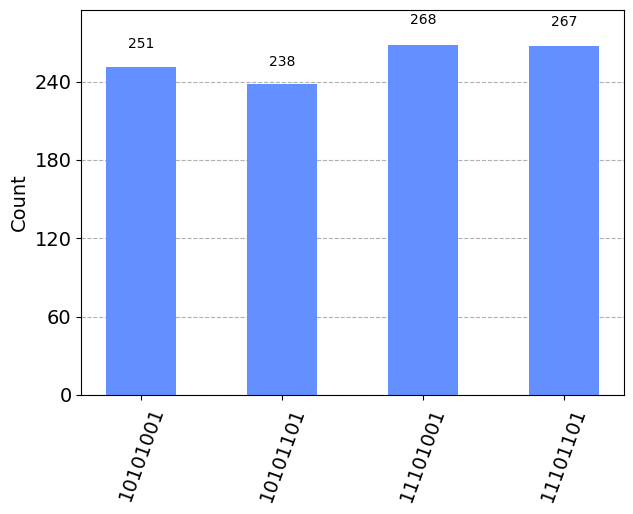

In [23]:
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts())


**The encryption key for this circuit is 110101**

# Histogram Analysis
The histogram displays the frequency of each possible measurement outcome for the qubits in the circuit. The most frequent outcome, "11101001", occurred 268 times, indicating that Alice and Bob have successfully generated a shared secret key. This key is secure because it is only known to them and cannot be intercepted by an eavesdropper.
# Quantum Superposition
The qubits exist in a quantum superposition state, meaning they can exist in multiple states simultaneously. When Bob measures the qubits, the superposition collapses into a definite classical state, but there is still some uncertainty about which state he will observe. This is reflected in the histogram, where other possible measurement outcomes have some probability of occurring, although less frequently.
